## Demonstração Redes Neurais

#### Importando as Bibliotecas Necessárias:

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

#### Baixando e carregando o Dataset MNIST:

In [3]:
print('[INFO] acessing MNIST...')
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] acessing MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#### Rearrumando o conjunto de dados e normalizando o dados:

In [5]:
# Rearrumando os dados:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# Normalizando os dados:
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

#### Binarizar a classe para adequar a última camada:

In [6]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

#### Definir a Arquitetura da Rede Neural:

In [7]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

c:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Treinando o Modelo:

In [8]:
sgd= SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1306 - loss: 2.3418 - val_accuracy: 0.2204 - val_loss: 2.2441
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3197 - loss: 2.2287 - val_accuracy: 0.4945 - val_loss: 2.1695
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4709 - loss: 2.1489 - val_accuracy: 0.5301 - val_loss: 2.0639
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5462 - loss: 2.0351 - val_accuracy: 0.5541 - val_loss: 1.9096
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5777 - loss: 1.8711 - val_accuracy: 0.6211 - val_loss: 1.7051
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6354 - loss: 1.6619 - val_accuracy: 0.6682 - val_loss: 1.4825
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6846 - loss: 1.4396 - val_accuracy: 0.7310 - val_loss: 1.2820
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7281 - loss: 1.2516 - val_accu

#### Conferir o Desempenho da Rede Neural:

In [9]:
predictions = model.predict(testX, batch_size=128) # predições
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_])) # relatório de classificação

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.89      0.92      0.91      1010
           4       0.91      0.94      0.93       982
           5       0.90      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.90      0.88      0.89       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



#### Visualização da Evolução da Rede Neural:

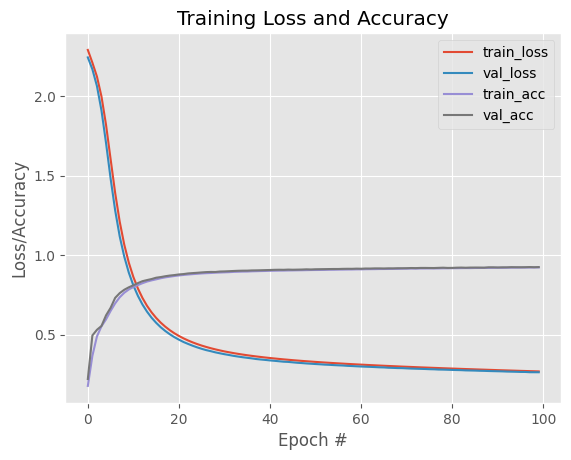

In [11]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()